In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

%matplotlib inline

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

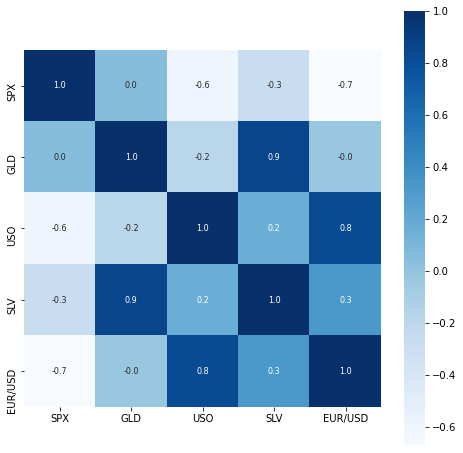

In [10]:
plt.figure(figsize= (8, 8))
sns.heatmap(correlation, cbar= True, square= True, fmt= '.1f', annot= True, annot_kws={'size':8}, cmap= 'Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

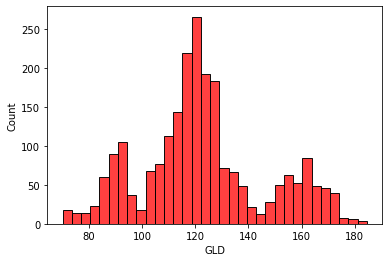

In [12]:
sns.histplot(gold_data['GLD'], color='r')

In [13]:
X = gold_data.drop(['Date', 'GLD'], axis= 1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [17]:
regressor = RandomForestRegressor(n_estimators= 100)

In [18]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [19]:
test_data_prediction = regressor.predict(X_test)

In [20]:
pickle.dump(regressor, open('gld_value.pkl', 'wb'))

In [21]:
loadedModel = pickle.load(open('gld_value.pkl', 'rb'))

In [26]:
loadedModel.predict([[1447.160034,  78.470001,  15.1800,  1.471692]])

array([84.98790016])

In [22]:
print(regressor.predict([[1447.160034,  78.470001,  15.1800,  1.471692]]))

[84.98790016]


In [23]:
print(test_data_prediction)

[168.71209961  81.47920022 115.99500047 127.54270071 120.63860164
 154.66789789 150.32099881 125.93700046 117.54959893 126.24810024
 116.64980128 171.82550079 141.36639839 168.00599851 115.03310056
 117.60640044 140.38300264 170.23380103 159.37990375 161.51059884
 155.11440027 125.48170011 175.45379954 157.40340258 125.10820043
  93.7326999   77.18780018 120.96870002 119.12289932 167.48280015
  88.25130037 125.11049984  91.11810063 117.57560076 121.15129913
 136.5432001  115.53980108 115.00450075 148.32479947 107.36580075
 104.30350255  87.10879776 126.59680037 118.09049979 153.66799915
 119.52159998 108.37569974 108.14779863  93.22500052 127.17629742
  75.4434     113.58839883 121.51159998 111.33359909 118.93369888
 120.94729916 159.5157006  167.26880109 147.02209622  85.75529841
  94.23560042  86.85239864  90.66210018 118.9825007  126.4998006
 127.65130045 170.13080011 122.31209931 117.27169859  98.46980062
 168.73110155 143.20849827 132.20220274 121.2628021  121.13309952
 119.738800

In [24]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared eoor: ', error_score)

R squared eoor:  0.9892822019925032


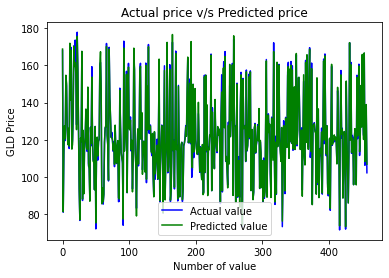

In [25]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual price v/s Predicted price')
plt.xlabel('Number of value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()